# Analysis of scaling execution times

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [79]:
mpi_strong_times = pd.read_csv('mpi_strong_scaling.csv')
mpi_weak_times = pd.read_csv('mpi_weak_scaling.csv')
omp_strong_times = pd.read_csv('omp_strong_scaling.csv')
omp_weak_times = pd.read_csv('omp_weak_scaling.csv')

## MPI Strong Scaling

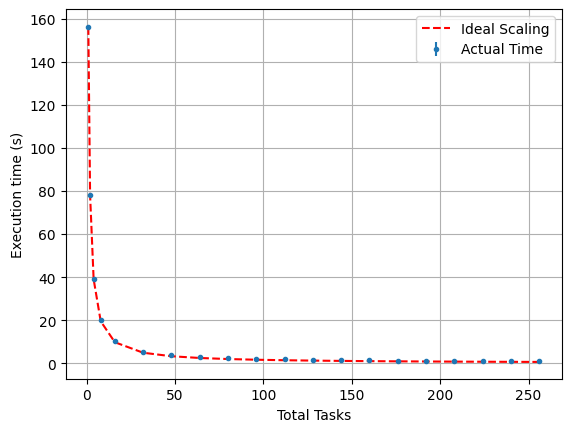

In [80]:
mpi_strong_mean_times = mpi_strong_times.groupby('Total Tasks').mean()
mpi_strong_std_times = mpi_strong_times.groupby('Total Tasks').std()

serial_time = mpi_strong_mean_times['Elapsed Time(s)'].iloc[0]
ideal_time = serial_time / mpi_strong_mean_times.index

plt.errorbar(mpi_strong_mean_times.index, mpi_strong_mean_times['Elapsed Time(s)'], yerr=mpi_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(mpi_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')

plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')
plt.grid()
plt.legend()
plt.savefig('figures/mpi_strong_scaling.png')
plt.show()

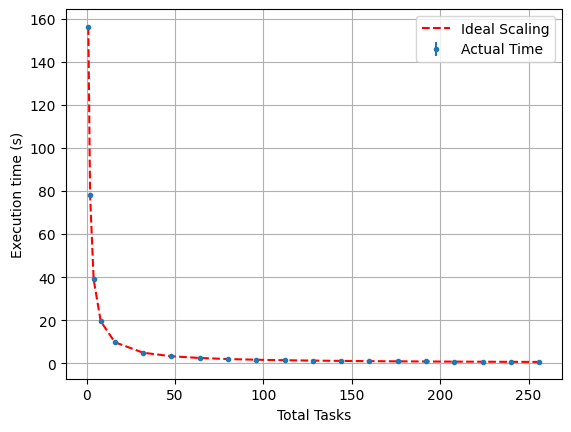

In [81]:
mpi_strong_mean_times = mpi_strong_times.groupby('Total Tasks').mean()
mpi_strong_std_times = mpi_strong_times.groupby('Total Tasks').std()

serial_time = mpi_strong_mean_times['Computation Time(s)'].iloc[0]
ideal_time = serial_time / mpi_strong_mean_times.index

plt.errorbar(mpi_strong_mean_times.index, mpi_strong_mean_times['Computation Time(s)'], yerr=mpi_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(mpi_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')

plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')

plt.grid()
plt.legend()
plt.savefig('figures/mpi_strong_scaling_computation.png')
plt.show()

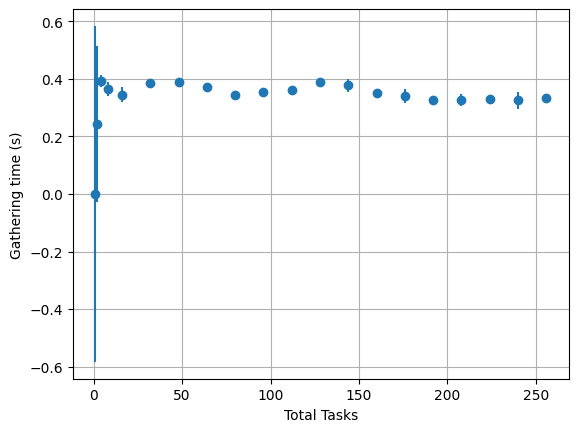

In [82]:
mpi_strong_mean_times = mpi_strong_times.groupby('Total Tasks').mean()
mpi_strong_std_times = mpi_strong_times.groupby('Total Tasks').std()

plt.errorbar(mpi_strong_mean_times.index, mpi_strong_mean_times['Gathering Time(s)'], yerr=mpi_strong_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Gathering time (s)')
plt.grid()
plt.savefig('figures/mpi_strong_scaling_gathering.png')
plt.show()

## Speedup and Efficiency of MPI Strong Scaling

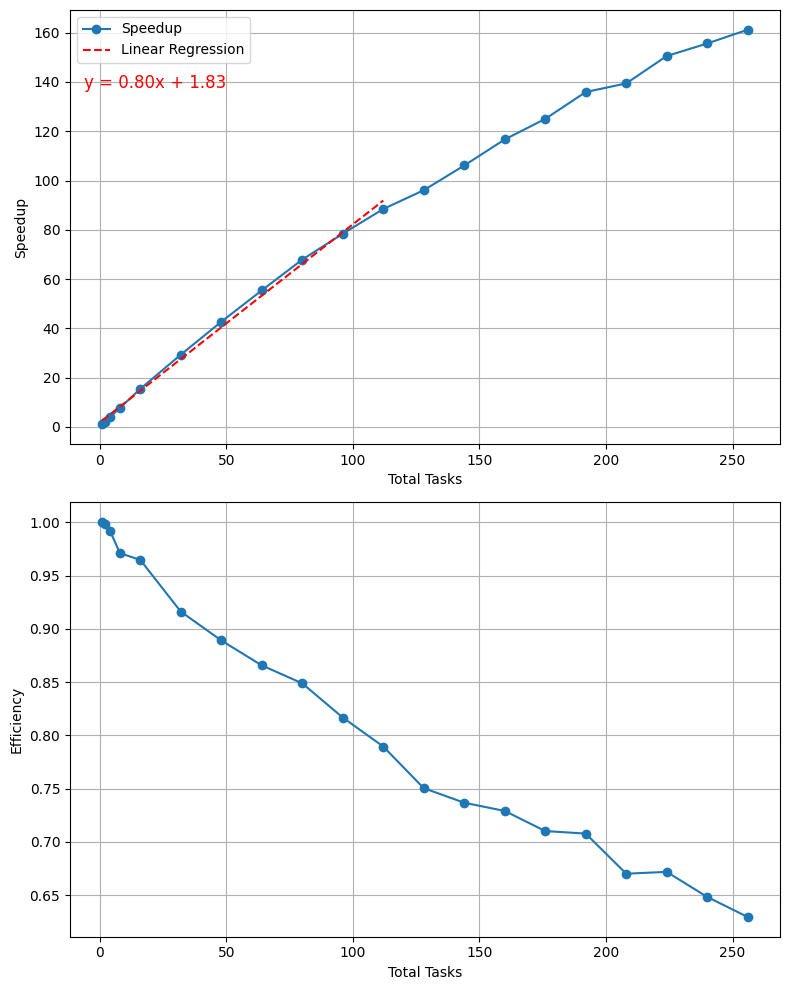

In [83]:
mpi_strong_serial_time = mpi_strong_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(2, 1, figsize=(8, 10))

mpi_strong_speedup = mpi_strong_serial_time / mpi_strong_mean_times['Elapsed Time(s)']
ax1[0].plot(mpi_strong_mean_times.index, mpi_strong_speedup, '-o', label='Speedup')
ax1[0].set_xlabel('Total Tasks')
ax1[0].set_ylabel('Speedup')
ax1[0].grid()


x = mpi_strong_mean_times.index[:11]
y = mpi_strong_speedup[:11]
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)


ax1[0].plot(x, linear_model(x), 'r--', label='Linear Regression')
slope, intercept = coefficients
ax1[0].text(0.02, 0.82, f'y = {slope:.2f}x + {intercept:.2f}', transform=ax1[0].transAxes, color='red', fontsize=12)

ax1[0].legend()
plt.tight_layout()

ax1[1].plot(mpi_strong_mean_times.index, mpi_strong_speedup /  mpi_strong_mean_times.index, '-o', label='Efficiency')
ax1[1].set_xlabel('Total Tasks')
ax1[1].set_ylabel('Efficiency')
ax1[1].grid()

plt.tight_layout()
plt.savefig('figures/mpi_strong_scaling_speedup_efficiency.png')
plt.show()

## MPI Weak Scaling

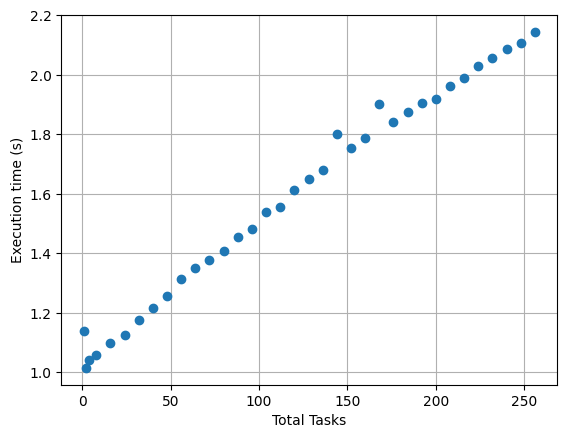

In [84]:
mpi_weak_mean_times = mpi_weak_times.groupby('Total Tasks').mean()
mpi_weak_std_times = mpi_weak_mean_times.groupby('Total Tasks').std()

plt.errorbar(mpi_weak_mean_times.index, mpi_weak_mean_times['Elapsed Time(s)'], yerr=mpi_weak_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')
plt.grid()
plt.savefig('figures/mpi_weak_scaling.png')
plt.show()

## Speedup and Efficiency of MPI Weak Scaling

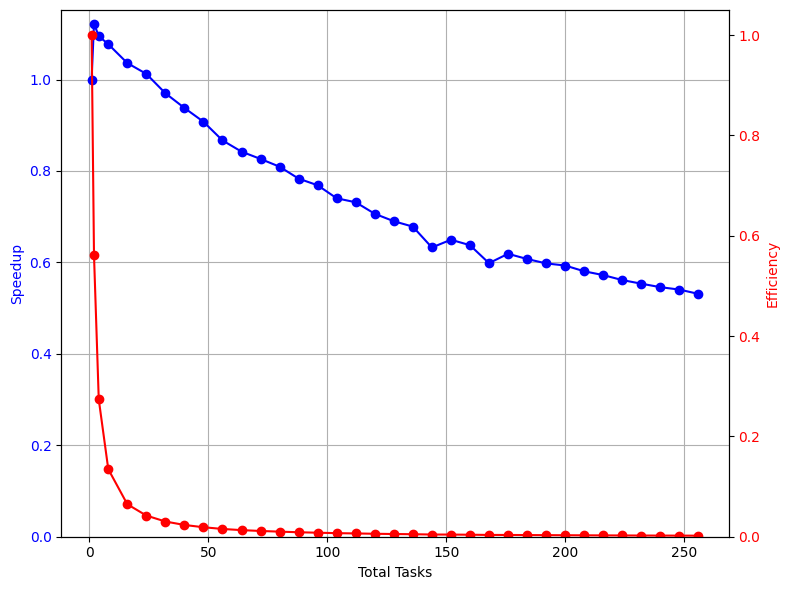

In [85]:
mpi_weak_serial_time = mpi_weak_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(figsize=(8, 6))

speedup = mpi_weak_serial_time / mpi_weak_mean_times['Elapsed Time(s)']
ax1.plot(mpi_weak_mean_times.index, speedup, '-o', color='b', label='Speedup')
ax1.set_xlabel('Total Tasks')
ax1.set_ylabel('Speedup', color='b')
ax1.grid()
ax1.set_ylim(0, None)
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
efficiency = speedup / mpi_weak_mean_times.index
ax2.plot(mpi_weak_mean_times.index, efficiency, '-o', color='r', label='Efficiency')
ax2.set_ylabel('Efficiency', color='r')
ax2.set_ylim(0, None)
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.savefig('figures/mpi_weak_scaling_speedup_efficiency.png')
plt.show()

## OpenMP Strong Scaling

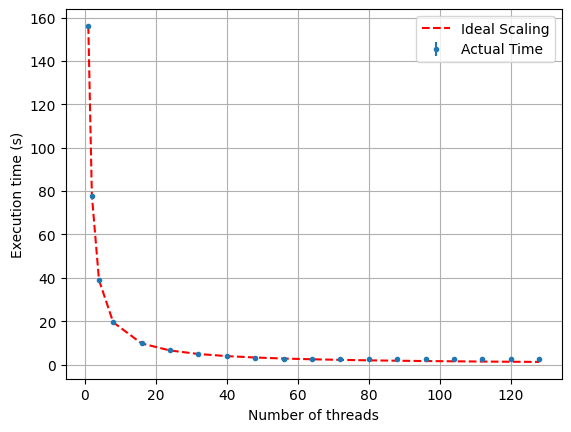

In [86]:
omp_strong_mean_times = omp_strong_times.groupby('Threads').mean()
omp_strong_std_times = omp_strong_times.groupby('Threads').std()
serial_time = omp_strong_mean_times['Elapsed Time(s)'].iloc[0]
ideal_time = serial_time / omp_strong_mean_times.index

plt.errorbar(omp_strong_mean_times.index, omp_strong_mean_times['Elapsed Time(s)'], yerr=omp_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(omp_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
plt.grid()
plt.legend()
plt.savefig('figures/omp_strong_scaling.png')
plt.show()

## Speedup and Efficiency of OpenMP Strong Scaling

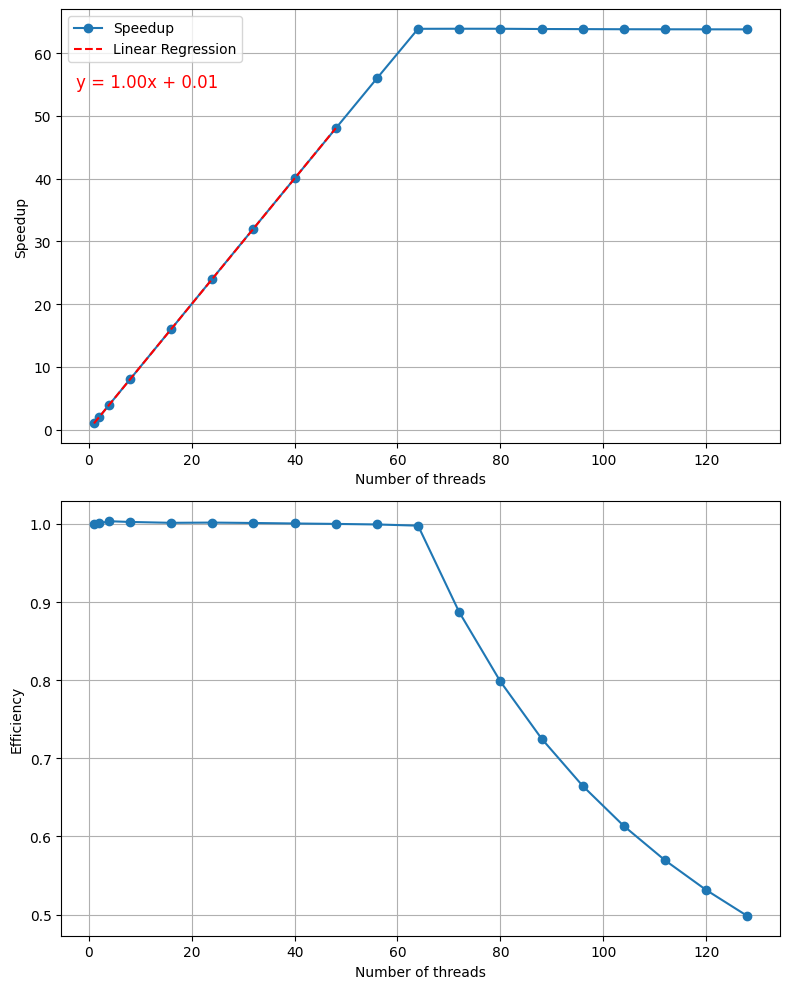

In [87]:
omp_strong_serial_time = omp_strong_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(2, 1, figsize=(8, 10))

omp_strong_speedup = omp_strong_serial_time / omp_strong_mean_times['Elapsed Time(s)']
ax1[0].plot(omp_strong_mean_times.index, omp_strong_speedup, '-o', label='Speedup')
ax1[0].set_xlabel('Number of threads')
ax1[0].set_ylabel('Speedup')
ax1[0].grid()

x = omp_strong_mean_times.index[:9]
y = omp_strong_speedup[:9]
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)

ax1[0].plot(x, linear_model(x), 'r--', label='Linear Regression')
slope, intercept = coefficients
ax1[0].text(0.02, 0.82, f'y = {slope:.2f}x + {intercept:.2f}', transform=ax1[0].transAxes, color='red', fontsize=12)
ax1[0].legend()
plt.tight_layout()

ax1[1].plot(omp_strong_mean_times.index, omp_strong_speedup / omp_strong_mean_times.index, '-o', label='Efficiency')
ax1[1].set_xlabel('Number of threads')
ax1[1].set_ylabel('Efficiency')
ax1[1].grid()

plt.tight_layout()
plt.savefig('figures/omp_strong_scaling_speedup_efficiency.png')
plt.show()

## OpenMP Weak Scaling

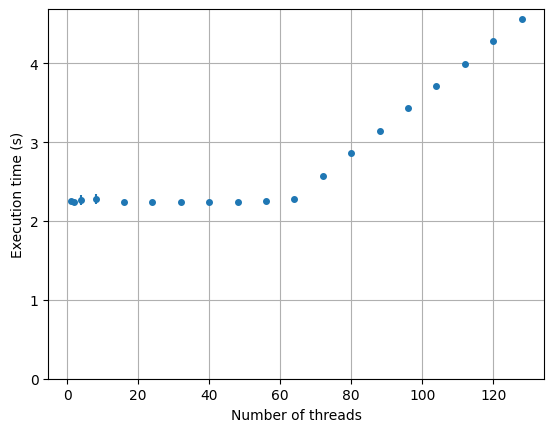

In [88]:
omp_weak_mean_times = omp_weak_times.groupby('Threads').mean()
omp_weak_std_times = omp_weak_times.groupby('Threads').std()

plt.errorbar(omp_weak_mean_times.index, omp_weak_mean_times['Elapsed Time(s)'], yerr=omp_weak_std_times['Elapsed Time(s)'], fmt='o', markersize=4)
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
plt.ylim(0, None)
plt.grid()
plt.savefig('figures/omp_weak_scaling.png')
plt.show()

## Speedup and Efficiency of OpenMP Weak Scaling

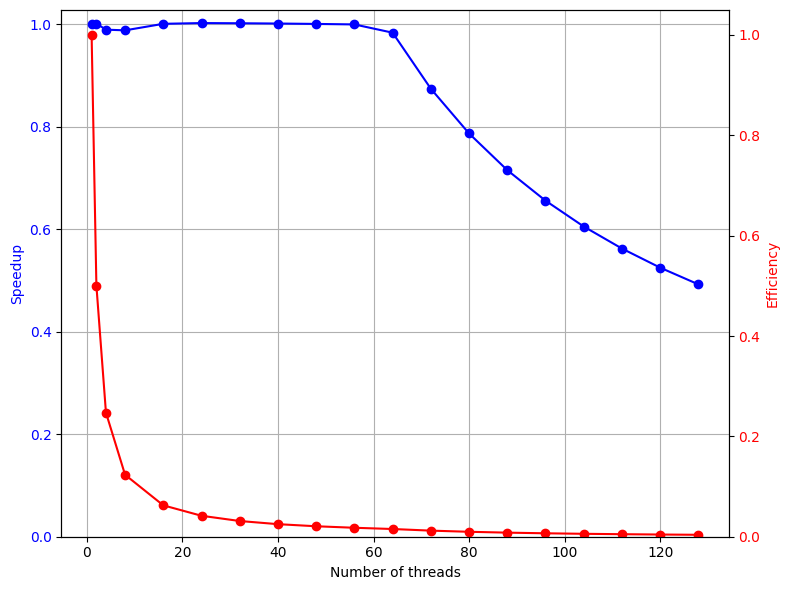

In [89]:
omp_weak_serial_time = omp_weak_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(figsize=(8, 6))

speedup = omp_weak_serial_time / omp_weak_mean_times['Elapsed Time(s)']
ax1.plot(omp_weak_mean_times.index, speedup, '-o', color='b', label='Speedup')
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Speedup', color='b')
ax1.grid()
ax1.set_ylim(0, None)
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
efficiency = speedup / omp_weak_mean_times.index
ax2.plot(omp_weak_mean_times.index, efficiency, '-o', color='r', label='Efficiency')
ax2.set_ylabel('Efficiency', color='r')
ax2.set_ylim(0, None)
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.savefig('figures/omp_weak_scaling_speedup_efficiency.png')
plt.show()